### About the Dataset
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [42]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**There is no null values in the dataset**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [44]:
df.shape

(150, 6)

In [45]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


- **ID column is like the row no so we can delete that**

In [46]:
df.drop(columns=['Id'],inplace=True,axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Exploratory Data Analysis**

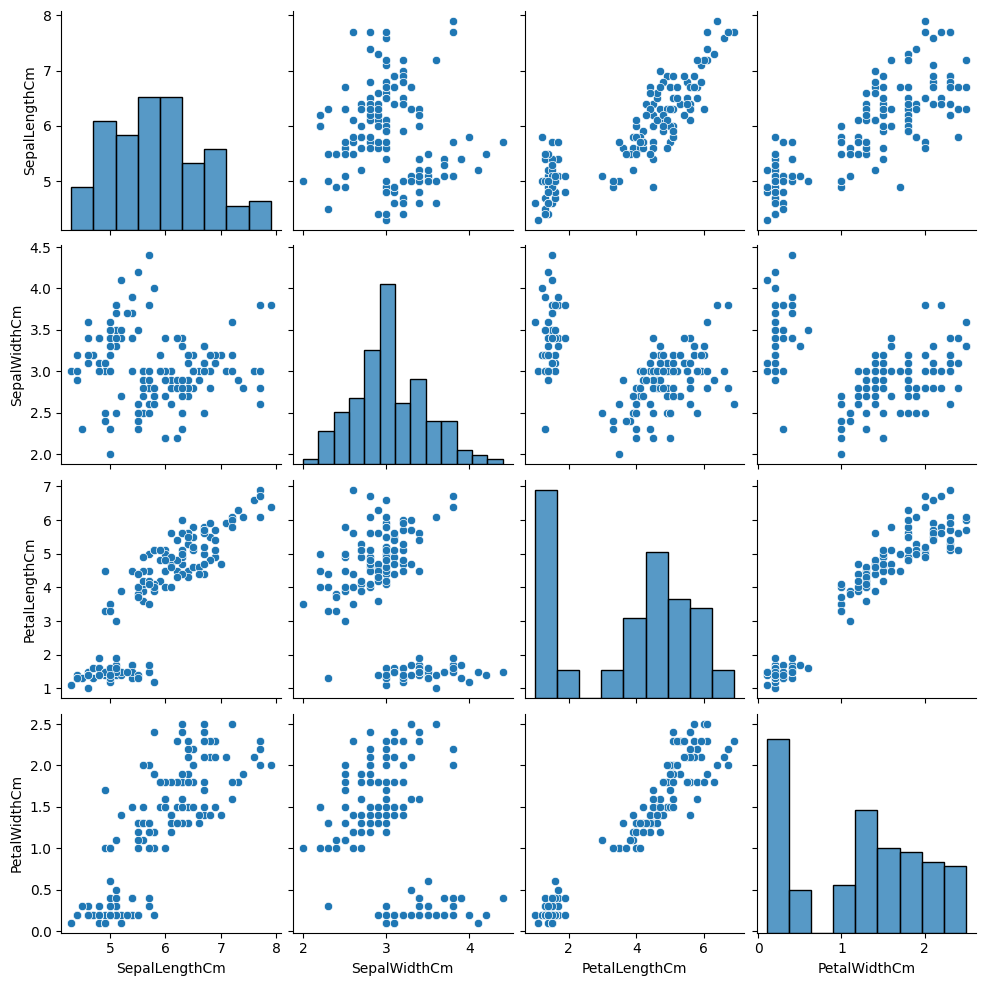

In [47]:
sns.pairplot(df)

In [48]:
mydf = df.drop(columns=['Species'],axis=1)

<Axes: >

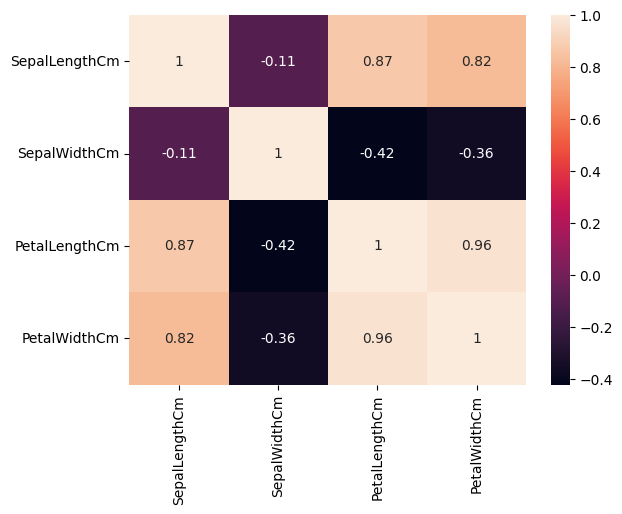

In [49]:
sns.heatmap(mydf.corr(),annot=True)

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

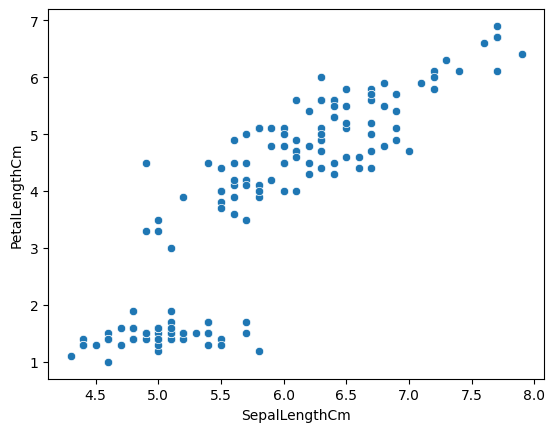

In [50]:
sns.scatterplot(x=df['SepalLengthCm'],y=df['PetalLengthCm'])

- We can see a high positive correlation between Sepal length and Petal Length

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

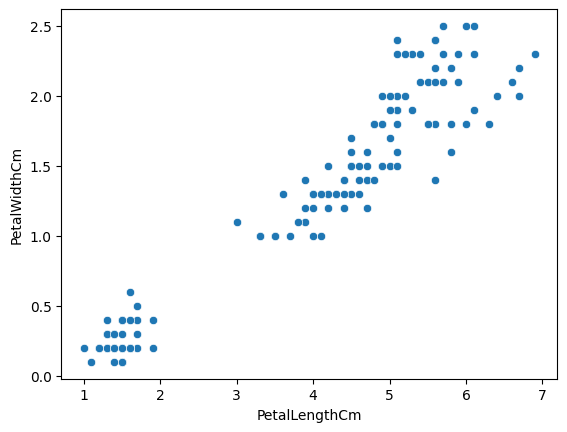

In [51]:
sns.scatterplot(x=df['PetalLengthCm'],y=df['PetalWidthCm'])

- There is a high positive correlation between Petal length and Petal Width
- So for removing multi-collinearity we can remove this two columns

In [52]:
df.drop(columns=['PetalLengthCm','PetalWidthCm'],axis=1,inplace=True)

In [53]:
df.head(5)

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

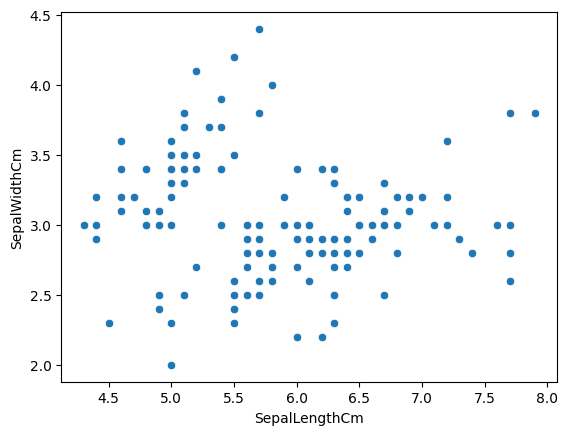

In [54]:
sns.scatterplot(x=df['SepalLengthCm'],y=df['SepalWidthCm'])

**There is no direct Relation between sepal length and sepal width**

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

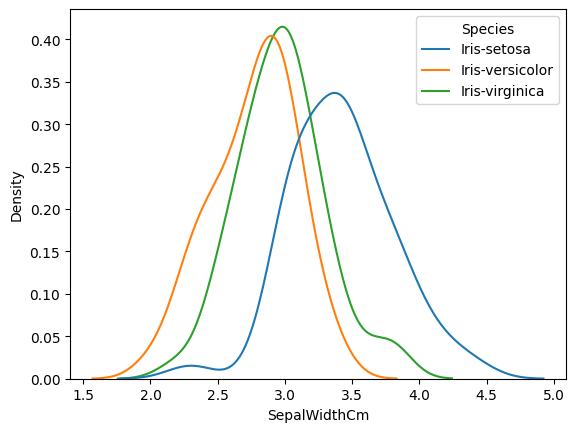

In [55]:
sns.kdeplot(x=df['SepalWidthCm'],hue=df['Species'])

- Setosa flowers has more sepal width

In [56]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df.Species)

In [58]:
df.head()

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [59]:
X = df.drop(columns=['Species'])
y = df['Species']

In [60]:
X

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [63]:
X_test = scaler.transform(X_test)

In [64]:
X_train

array([[ 0.52520076,  0.47987382],
       [-1.71903059, -0.1975951 ],
       [-0.06538644, -0.64924105],
       [-1.12844339,  0.02822787],
       [-1.01032596,  0.25405085],
       [-1.12844339, -1.32670998],
       [ 0.99767052,  0.02822787],
       [-0.65597364,  1.38316572],
       [-1.71903059, -0.42341808],
       [-0.06538644, -0.87506403],
       [-0.77409108,  0.93151977],
       [-0.89220852, -1.32670998],
       [-1.24656083, -0.1975951 ],
       [-0.5378562 ,  1.38316572],
       [ 0.52520076, -0.87506403],
       [ 0.40708332,  0.7056968 ],
       [ 0.28896588, -0.1975951 ],
       [ 0.17084844, -2.0041789 ],
       [ 1.58825771,  1.15734275],
       [ 1.58825771,  0.25405085],
       [-0.30162132, -0.87506403],
       [ 0.76143564,  0.25405085],
       [-1.01032596,  0.93151977],
       [-1.24656083, -0.1975951 ],
       [-1.01032596, -1.77835593],
       [-0.89220852,  0.7056968 ],
       [ 1.23390539,  0.25405085],
       [-1.24656083,  0.02822787],
       [ 0.6433182 ,

In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr')

In [66]:
model.fit(X_train,y_train)

c:\Users\Paul\Desktop\Learnings\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [67]:
y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score = accuracy_score(y_test,y_pred)
print(score)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7631578947368421
[[11  0  0]
 [ 0  9  7]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.82      0.56      0.67        16
           2       0.56      0.82      0.67        11

    accuracy                           0.76        38
   macro avg       0.79      0.79      0.78        38
weighted avg       0.80      0.76      0.76        38



In [69]:
model = LogisticRegression(multi_class='ovr')

In [70]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
cv = StratifiedKFold()
penalty = ['l1','l2','elasticnet']
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
c_values = [100,10,1,0.1,0.01]

In [71]:
params = dict(penalty=penalty,solver=solver,C=c_values)

In [72]:
grid = GridSearchCV(estimator=model,param_grid=params,cv=cv,scoring='accuracy')

In [73]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [76]:
grid.fit(X_train,y_train)

c:\Users\Paul\Desktop\Learnings\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Paul\Desktop\Learnings\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Paul\Desktop\Learnings\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Paul\Desktop\

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [78]:
grid.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [79]:
y_pred = grid.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score = accuracy_score(y_test,y_pred)
print(score)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7894736842105263
[[11  0  0]
 [ 0 10  6]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      0.62      0.71        16
           2       0.60      0.82      0.69        11

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38



In [83]:
from sklearn.model_selection import RandomizedSearchCV
randomcv = RandomizedSearchCV(estimator=model,param_distributions=params,cv=2,scoring='accuracy')

In [84]:
randomcv.fit(X_train,y_train)
randomcv.best_params_

c:\Users\Paul\Desktop\Learnings\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Paul\Desktop\Learnings\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Paul\Desktop\Learnings\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Paul\Desktop\

{'solver': 'liblinear', 'penalty': 'l1', 'C': 100}

In [85]:
y_pred = randomcv.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score = accuracy_score(y_test,y_pred)
print(score)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7894736842105263
[[11  0  0]
 [ 0 10  6]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      0.62      0.71        16
           2       0.60      0.82      0.69        11

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38

